In [1]:
import numpy as np
from scipy.integrate import trapezoid
from scipy.constants import Avogadro, Boltzmann
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Define hard sphere potential,square well potential
def hard_sphere_potential(r, sigma):
    if r < sigma:
        return 1000 # Approximate infinity as 1000.
    else:
        return 0

def square_well_potential(r, epsilon, sigma, lambda_factor):
    if r < sigma:
        return 1000
    elif sigma <= r < lambda_factor * sigma:
        return -epsilon
    else:
        return 0

# Import lennard jones potential form homework-2-1
from Lennard_Jones_Potential import lennard_jones_potential


In [3]:
# Define second virial coefficient
def B2V_integral(potential, sigma, epsilon, T, lambda_factor=None):
   
    kB = Boltzmann  
    NA = Avogadro   

# Perform the integration over the distance r from 0 to 5 * sigma
    r_min = sigma / 1000
    r_max = 5 * sigma
    r = np.linspace(r_min, r_max, 1000)

# u(r) in the integral function   
    if potential == "hard_sphere":
        u_r = np.array([hard_sphere_potential(ri, sigma) for ri in r])
    elif potential == "square_well":
        u_r = np.array([square_well_potential(ri, epsilon, sigma, lambda_factor) for ri in r])
    elif potential == "lennard_jones":
        u_r = lennard_jones_potential(r, epsilon, sigma)
    
# Integral function    
    function_r = (np.exp(-u_r / (kB * T)) - 1) * r**2

# Calaulate B2V    
    integral_value = trapezoid(function_r, r)    
    B2V = -2 * np.pi * NA * integral_value
    
    return B2V


In [4]:
sigma = 3.4e-10 # Convert to meter, otherwise "overflow"
epsilon = 0.01 * 1.6022e-19 # convert to Joule, otherwise "overflow"
lambda_factor = 1.5
T = 100

# Compute B2V for each potential at 100 K
B2V_hard_sphere = B2V_integral("hard_sphere", sigma, epsilon, T)
B2V_square_well = B2V_integral("square_well", sigma, epsilon, T, lambda_factor)
B2V_lennard_jones = B2V_integral("lennard_jones", sigma, epsilon, T) 

print(f"The seccond virial coefficient B2V for hard sphere potential at 100 K:{B2V_hard_sphere:.6f} m^3/mol" )
print(f"The seccond virial coefficient B2V for square well potential at 10 0 K:{B2V_square_well:.6f} m^3/mol")
print(f"The seccond virial coefficient B2V for lennard jones potential at 100 K:{B2V_lennard_jones:.6f} m^3/mol")

The seccond virial coefficient B2V for hard sphere potential at 100 K:0.000049 m^3/mol
The seccond virial coefficient B2V for square well potential at 10 0 K:-0.000209 m^3/mol
The seccond virial coefficient B2V for lennard jones potential at 100 K:-0.000161 m^3/mol


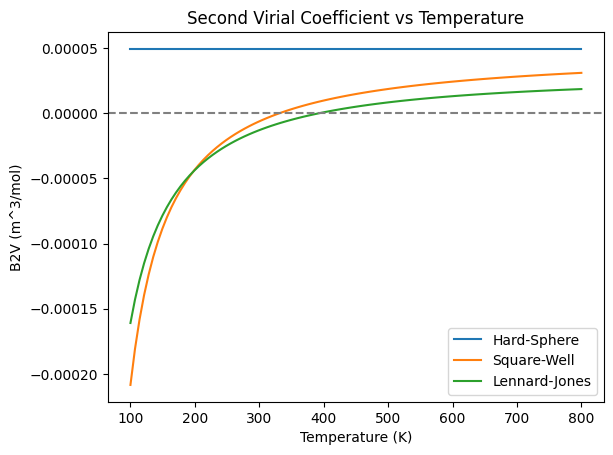

In [5]:
# Temperature range:
temperatures = np.linspace(100, 800, 100)

# Compute B2V for each potential at 100 to 800 K
B2V_hard_sphere = [B2V_integral("hard_sphere", sigma, epsilon, T) for T in temperatures]
B2V_square_well = [B2V_integral("square_well", sigma, epsilon, T, lambda_factor) for T in temperatures]
B2V_lennard_jones = [B2V_integral("lennard_jones", sigma, epsilon, T) for T in temperatures]

# Plot the figure
plt.plot(temperatures, B2V_hard_sphere, label="Hard-Sphere")
plt.plot(temperatures, B2V_square_well, label="Square-Well")
plt.plot(temperatures, B2V_lennard_jones, label="Lennard-Jones")
plt.axhline(0, color="grey", linestyle="--") # Add a line at B2V = 0.
plt.xlabel("Temperature (K)")
plt.ylabel("B2V (m^3/mol)")
plt.legend()
plt.title("Second Virial Coefficient vs Temperature")
plt.show()

In [6]:
# Export the B2V data by pandas

data = {
    'Temperature (K)': temperatures,
    'B2V Hard-Sphere (m^3/mol)': B2V_hard_sphere,
    'B2V Square-Well (m^3/mol)': B2V_square_well,
    'B2V Lennard-Jones (m^3/mol)': B2V_lennard_jones
}

df = pd.DataFrame(data)
df.to_csv('B2V_value.csv')